In [27]:
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#LOAD THE DATA
from keras.datasets import cifar10

#training and test datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [29]:
#get the shape of the array
print('x_train shape:', x_train.shape)   # 50000 rows of data, with 32x32 images each row, depth of image color is 3
print('y_train shape:', y_train.shape)   # 50000 rows and 1 column
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [30]:
#Print the first image of train dataset as an array
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

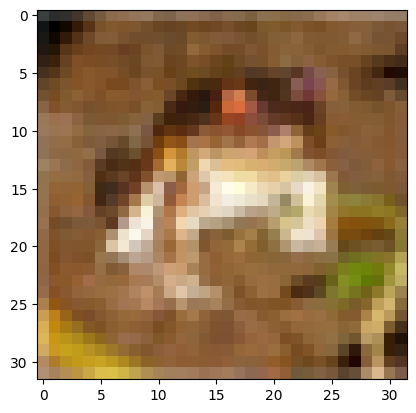

In [31]:
#Print the first image of the train dataset as a picture
img = plt.imshow(x_train[0])

In [32]:
#get the first image label
print("The image label is:", y_train[0])

The image label is: [6]


In [33]:
#LABEL THE CLASSES
classifications = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [34]:
#get the first image label name
print('The image class is:', classifications[y_train[0][0]])


The image class is: frog


In [35]:
#CONVERT THE LABELS INTO A SET OF 10 NUMS TO INPUT INTO NEURAL NETWORK
y_train_new_label = to_categorical(y_train)
y_test_new_label = to_categorical(y_test)


In [36]:
#Print the new labels
print(y_train_new_label)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [37]:
#Print the new labels of the image printed above (frog)
print(y_train_new_label[0])


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [38]:
#NORMALIZE THE PIXELS into values between 0 and 1
x_train = x_train /255
x_test = x_test /255

In [39]:
#check if the pixels are between 0 and 1 as expected
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [40]:
#CREATE MODELS ARCHITECTURE

model = Sequential()

#add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

#add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add another drop out layer
model.add(Dropout(0.5))

#Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
#COMPILE THE MODEL
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [42]:
#TRAIN THE MODEL
hist = model.fit(x_train, y_train_new_label,
                 batch_size=256,
                 epochs=10,
                 validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 210ms/step - accuracy: 0.2280 - loss: 2.0350 - val_accuracy: 0.3941 - val_loss: 1.6644
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - accuracy: 0.4368 - loss: 1.5295 - val_accuracy: 0.4966 - val_loss: 1.3910
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 208ms/step - accuracy: 0.5129 - loss: 1.3423 - val_accuracy: 0.5351 - val_loss: 1.2752
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.5481 - loss: 1.2411 - val_accuracy: 0.5413 - val_loss: 1.2791
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.5807 - loss: 1.1640 - val_accuracy: 0.5953 - val_loss: 1.1301
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - accuracy: 0.6068 - loss: 1.1005 - val_accuracy: 0.6015 - val_loss: 1.1159
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.6248 - loss: 1.0438 - val_accuracy: 0.6280 - val_loss: 1.0482
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - accuracy: 0.6469 - loss: 0

In [43]:
#EVALUATE THE MODEL USING THE TEST DATASET
model.evaluate(x_test, y_test_new_label)[1]


105/313 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6541 - loss: 0.9675

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6549 - loss: 0.9700


0.6550999879837036

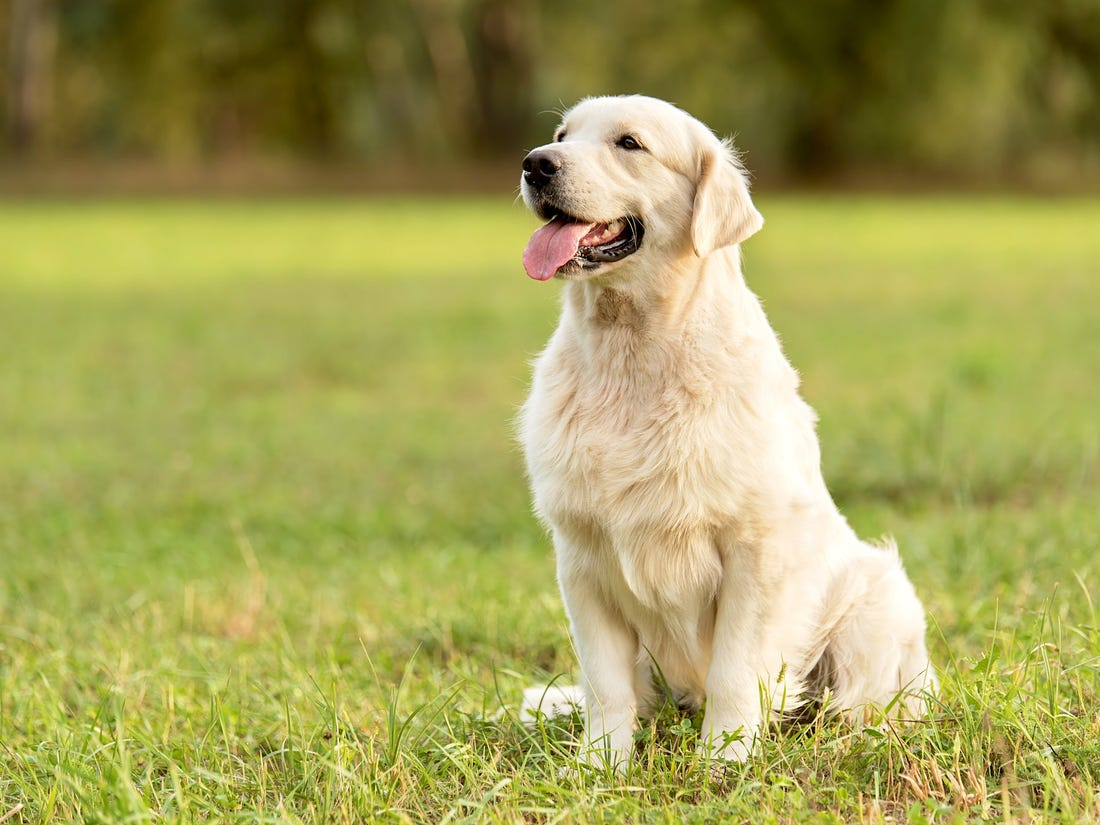

In [44]:
#TEST THE MODEL WITH A REAL EXAMPLE

#show the image
from IPython.display import Image
Image(filename='dog_test.jpeg')


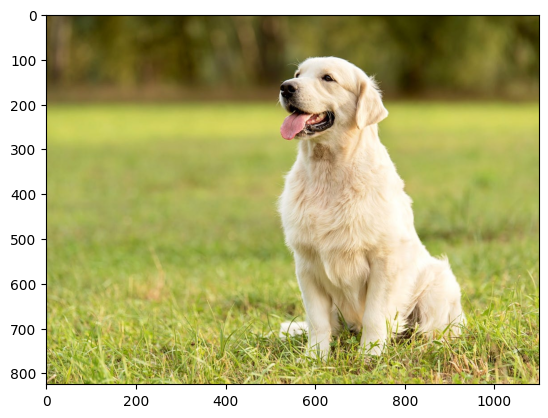

In [45]:
#show image using plt
test_img = plt.imread('dog_test.jpeg')
plt.imshow(test_img)


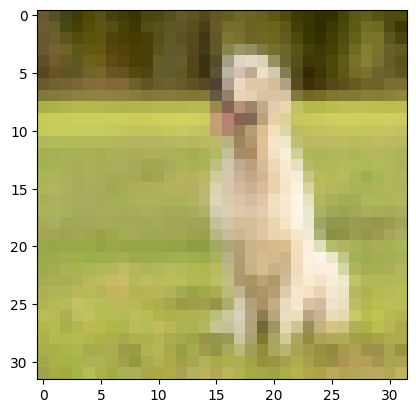

In [46]:
#resize the image to 32x32, depth 3
from skimage.transform import resize

resized_img = resize(test_img, (32, 32, 3))
plt.imshow(resized_img)


In [47]:
#TEST IF MODEL CAN PREDICT THIS IS A DOG

#get model prediction
predictions = model.predict(np.array([resized_img]))

#Show the predictions
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[1.5936978e-03, 4.9198639e-05, 3.7553138e-01, 4.2012397e-02,
        1.1522037e-01, 3.2505822e-01, 2.5934605e-03, 1.3764314e-01,
        1.1675236e-04, 1.8129565e-04]], dtype=float32)

In [48]:
#highest value from results above means the ones model thinks is the most accurate to the picture
#Let's sort the array to get the highest number

list_index = [0,1,2,3,4,5,6,7,8,9]  #each index represents a classifications we have
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

#show sorted labels in descending order
print(list_index)


[2, 5, 7, 4, 3, 6, 0, 9, 8, 1]


In [49]:
#show the first 5 classifications
for i in range(5):
    print(classifications[list_index[i]], "-", predictions[0][list_index[i]] * 100, "%")


bird - 37.55314 %
dog - 32.50582 %
horse - 13.764315 %
deer - 11.522037 %
cat - 4.2012396 %
